In [1]:
!unzip ../input/dogs-vs-cats/train.zip

Archive:  ../input/dogs-vs-cats/train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/cat.100

In [2]:
#Check to make sure GPU is present and able to be used
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


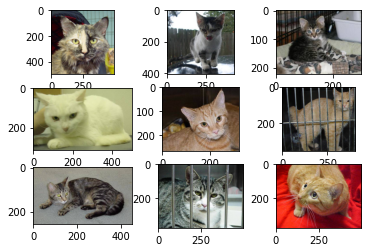

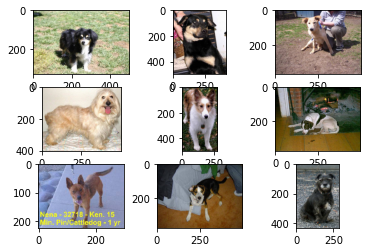

In [3]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot as plt
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat.' + str(10+i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(20+i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

In [4]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70
293/293 [==============================] - 212s 714ms/step - loss: 2.4193 - accuracy: 0.5319 - val_loss: 0.6299 - val_accuracy: 0.6419
Epoch 2/70
293/293 [==============================] - 205s 699ms/step - loss: 0.6173 - accuracy: 0.6494 - val_loss: 0.5859 - val_accuracy: 0.6819
Epoch 3/70
293/293 [==============================] - 205s 700ms/step - loss: 0.5804 - accuracy: 0.6857 - val_loss: 0.5692 - val_accuracy: 0.6998
Epoch 4/70
293/293 [==============================] - 208s 707ms/step - loss: 0.5497 - accuracy: 0.7226 - val_loss: 0.5053 - val_accuracy: 0.7552
Epoch 5/70
293/293 [==============================] - 202s 690ms/step - loss: 0.5334 - accuracy: 0.7343 - val_loss: 0.5135 - val_accuracy: 0.7436
Epoch 6/70
293/293 [==============================] - 202s 688ms/step - loss: 0.4977 - accuracy: 0.7597 - val_loss: 0.4601 - val_accuracy: 0.7780
Epoch 7/70
293/293 [==============================] - 203s 691ms/step - loss: 0.4760 - accuracy: 0.7708 - val_loss: 0.4293 -

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 93.479


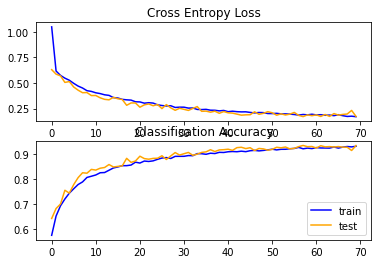

In [5]:
# baseline model with data augmentation for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam()
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss 
    pyplot.subplot(211) 
    pyplot.title('Cross Entropy Loss') 
    pyplot.plot(history.history['loss'], color='blue', label='train') 
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy 
    pyplot.subplot(212) 
    pyplot.title('Classification Accuracy') 
    pyplot.plot(history.history['accuracy'], color='blue', label='train') 
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.legend()
    # save plot to file 
    filename = sys.argv[0].split('/')[-1] 
    pyplot.savefig(filename + '_plot.png') 
    pyplot.show()



 


# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generators
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,
        width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=70, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    return model

# entry point, run the test harness
model = run_test_harness()

Code for saving and reopening model (Interrupts to training)

In [6]:
import tensorflow as tf
from tensorflow import keras
# saving the model in tensorflow format
model.save('./MyModel_tf',save_format='tf')

# Save the training history
import pandas as pd

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# Save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)



NameError: name 'history' is not defined

In [7]:
model = tf.keras.models.load_model('./MyModel_tf')